In [1]:
from typing import List
from numpy import linspace, array
from numpy.linalg import solve
from math import cos, pi, sqrt
from matplotlib import pyplot as plt
%matplotlib inline

## Полином Лежандра

In [2]:
def leg_polym(n, x):
    if n < 2:
        return [1, x][n]

    P1 = leg_polym(n - 1, x)
    P2 = leg_polym(n - 2, x)

    return ((2 * n - 1) * x * P1 - (n - 1) * P2) / n

## Производная

In [3]:
def leg_polym_deriv(n, x):
    P1 = leg_polym(n - 1, x)
    P2 = leg_polym(n, x)

    return n / (1 - x * x) * (P1 - x * P2)

## Поиск корней Ньютоном

In [4]:
def leg_roots(n: int, eps: float = 1e-12) -> List[float]:
    roots = [cos(pi * (4 * i + 3) / (4 * n + 2)) for i in range(n)]  # нач. приближение

    for i, root in enumerate(roots):
        root_val = leg_polym(n, root)

        while abs(root_val) > eps:
            root -= root_val / leg_polym_deriv(n, root)
            root_val = leg_polym(n, root)

        roots[i] = root

    return roots

## Интегрироавние в [1, 1]

In [5]:
def norm_gauss_integ(f, n):
    t = leg_roots(n)  # корни полинома Лежандра n-ой степени
    T = array([[t_i**k for t_i in t] for k in range(n)])

    int_tk = lambda k: 2 / (k + 1) if k % 2 == 0 else 0
    b = array([int_tk(k) for k in range(n)])  # правая часть

    A = solve(T, b)  # находим коэффициенты А

    return sum(A_i * f(t_i) for A_i, t_i in zip(A, t))

## [-1, 1] -> [a, b]

In [6]:
def gauss_integ(f, a, b, n):
    mean, diff = (a + b) / 2, (b - a) / 2
    g = lambda t: f(mean + diff * t)
    return diff * norm_gauss_integ(g, n)

## Формула симпсона

In [7]:
def simp_integ(f, a, b, n):
    h = (b - a) / (n - 1)
    x = a
    res = 0

    for i in range((n - 1) // 2):
        res += f(x) + 4 * f(x + h) + f(x + 2 * h)
        x += 2 * h

    return res * (h / 3)

## Композиция методов интегрирования

In [8]:
# композиция методов интегрирования
def compose_integ(f, a1, b1, a2, b2, method_1, method_2, n1, n2):
    F = lambda x: method_1(lambda y: f(x, y), a2, b2, n1)
    return method_2(F, a1, b1, n2)

## Misc

In [9]:
def function_integ(f, a, b, c, d, n, m):
    return compose_integ(f, a, b, c, d, gauss_integ, simp_integ, n, m)

In [10]:
def in_circle(x, y):
    return (x**2 + y**2) - 2 * x <= 0

In [33]:
def function(n, m):
    f = lambda x, y: sqrt(x**2 + y**2) if in_circle(x, y) else 0
    F = lambda x: gauss_integ(lambda y: f(x, y), -1, 1, n)
    res = simp_integ(F, 0, 2, m)
    return res

In [34]:
print(function(7, 1000))


def f1(x):
    return 3 * x**3


print(gauss_integ(f1, 4, 5, 7))
print(simp_integ(f1, 4, 5, 1000))

3.5573013523238894
276.75
276.37473733492664


In [37]:
res = []
for i in range(3, 20):
    res.append(function(8, i))
    print(i)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [40]:
res

[3.0607829207499564,
 1.9002203722739335,
 3.5042181591715726,
 2.941230987875485,
 3.247083539671719,
 3.026670002887323,
 3.6094736039711344,
 3.2718462925294305,
 3.6772530840727504,
 3.2875742790114475,
 3.6526301602583224,
 3.409051035124964,
 3.399758009882033,
 3.3932657704862184,
 3.3628019782538177,
 3.3525116401749084,
 3.4686239216545536]

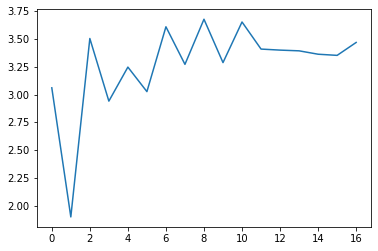

In [39]:
import numpy as np
plt.plot(np.array(res))